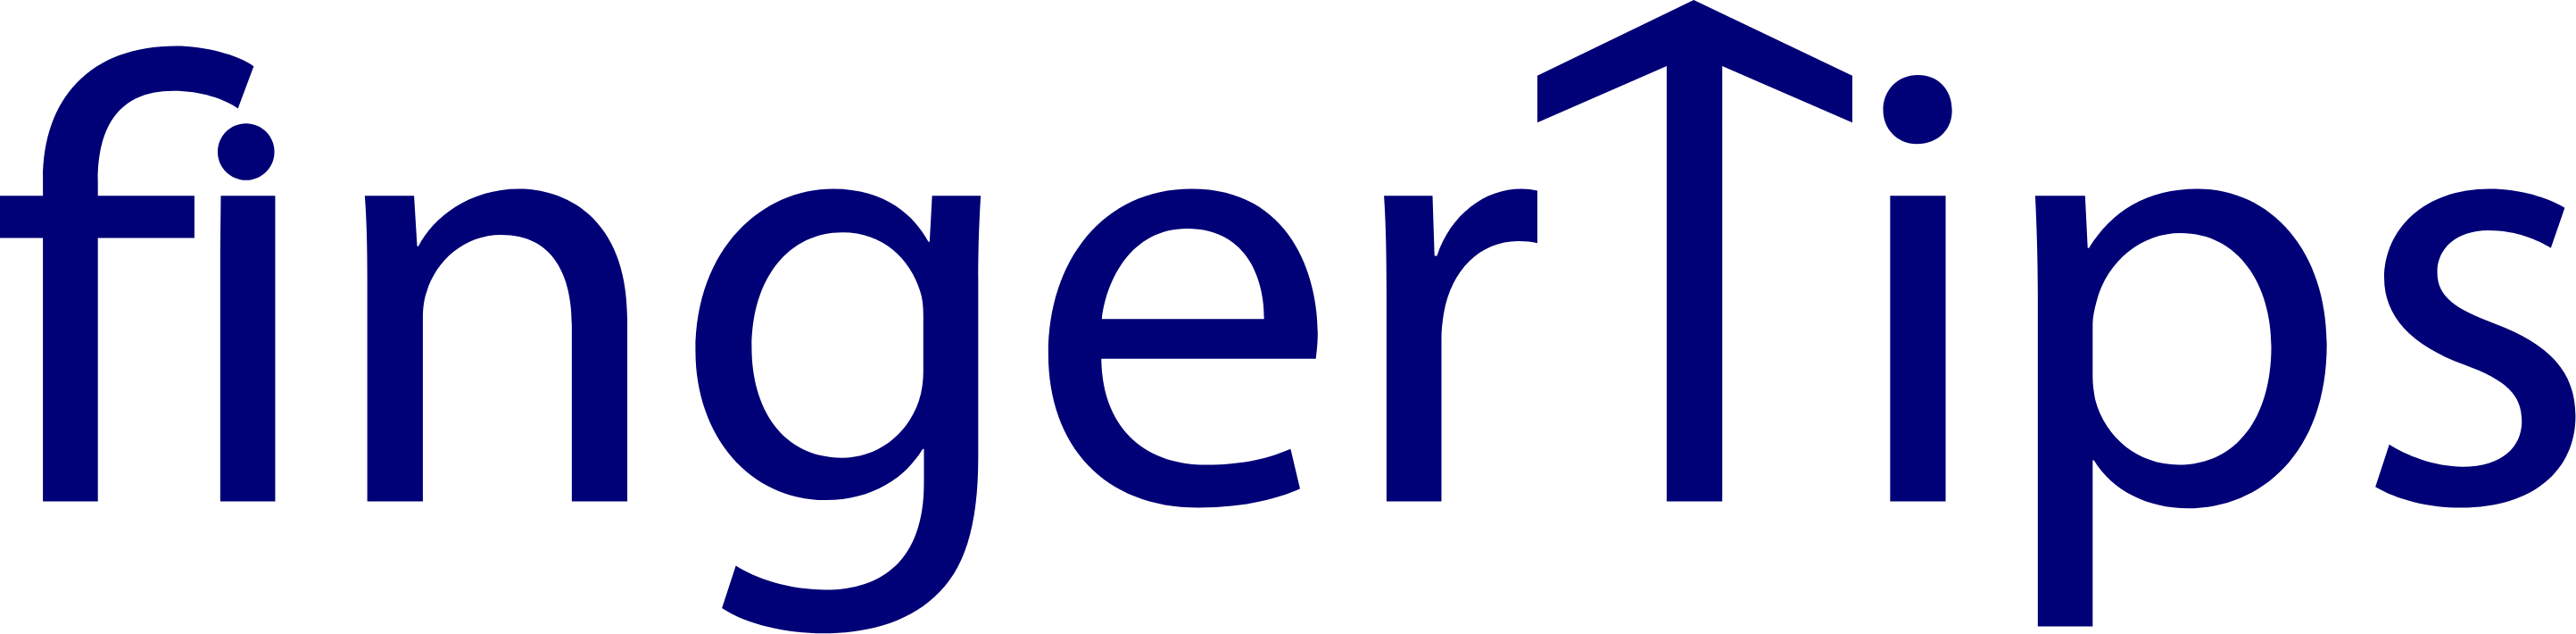

# RESUME SCANNER

## <span style='color:Blue'> Installing Dependencies  </span>
First, we need to install the necessary libraries. We will be installing PyPDF2, docx2txt and NLTK for this project. You can install them using the following commands.

1. !pip install PyPDF2: Installs the PyPDF2 Python package, which is used to extract text and metadata from PDF files.
2. !pip install docx2txt: Installs the docx2txt Python package, which is used to extract text from Microsoft Word documents.
3. !pip install nltk: Installs the nltk Python package, which is a widely-used library for natural language processing (NLP) tasks such as text classification, tokenization, and stemming.

In [1]:
!pip install PyPDF2
!pip install docx2txt
!pip install nltk

## <span style='color:Blue'> Importing Dependencies  </span>
Once you have installed the libraries, you can import them into your Python code as follows.

1. import PyPDF2: Imports the PyPDF2 module, which is used for working with PDF files in Python.
2. import nltk: Imports the nltk module, which is a popular natural language processing (NLP) library in Python.
3. from nltk.corpus import stopwords: Loads the stopwords corpus from nltk, which contains a list of commonly occurring words that can be ignored when processing text data.
4. from nltk.tokenize import word_tokenize: Loads the word_tokenize function from nltk, which splits text into individual words or tokens.
5. nltk.download('stopwords'): Downloads the stopwords dataset from nltk, if it is not already present on the system.
6. nltk.download('punkt'): Downloads the punkt dataset from nltk, which is used for tokenization.

In [8]:
import PyPDF2
import docx2txt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## <span style='color:Blue'> Function to extract text from pdf  </span>
Now, let's write a function that takes in a PDF file and converts it into text.

This is a Python function that takes a file path as input and returns the extracted text from a PDF file located at that path. Here's how the function works:

The extract_text_from_pdf() function opens the PDF file at the specified file path in read-binary mode ('rb') using the open() function from Python's built-in io module.

The PyPDF2 module's PdfReader() function is used to create a reader object for the opened PDF file.

The for loop iterates through each page of the PDF file, and for each page, its text is extracted using the extract_text() method of the page_obj object, which is returned as a string.

The extracted text is appended to the text variable, which is initially set to an empty string.

Finally, the PDF file is closed using the close() method of the pdf_file object, and the extracted text is returned by the function.

Overall, this function can be used to extract text data from PDF files in order to perform natural language processing (NLP) tasks such as text classification or sentiment analysis.

In [3]:
def extract_text_from_pdf(file_path):
    pdf_file = open(file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in range(len(pdf_reader.pages)):
        page_obj = pdf_reader.pages[page]
        text += page_obj.extract_text()
    pdf_file.close()
    return text

## <span style='color:Blue'> Function to extract text from docx  </span>
Now, let's write a function that takes in a docx file and converts it into text.

This is a Python function that takes a file path as input and returns the extracted text from a Microsoft Word document located at that path. Here's how the function works:

The extract_text_from_docx() function calls the docx2txt.process() function and passes the input file path as a parameter.

The process() function reads in the Word document at the specified file path and uses the python-docx package to convert its contents to plain text format.

The extracted text is stored in the text variable.

Finally, the extracted text is returned by the function.

Overall, this function can be used to extract text data from Word documents in order to perform natural language processing (NLP) tasks such as text classification or sentiment analysis.

In [4]:
def extract_text_from_docx(file_path):
    text = docx2txt.process(file_path)
    return text

## <span style='color:Blue'> Function to preprocess text  </span>
Next, we need to preprocess the text data. We will remove any stopwords, punctuation, and convert all words to lowercase.

This is a Python function that takes a text string as input and returns a preprocessed list of tokens. Here's how the function works:

The preprocess_text() function first loads the set of stopwords for English language using the stopwords.words('english') function from the nltk.corpus module.

The input text is converted to lowercase using the lower() method of string objects and tokenized into individual words using the word_tokenize() function from the nltk.tokenize module.

The for loop iterates through each word in the tokenized list of words, and filters out any words that are not alphabetic characters using the isalpha() method of string objects.

Additionally, any word that appears in the stopword set is also filtered out using the not in conditional statement.

The resulting list of filtered words or tokens is returned by the function.

Overall, this function can be used to preprocess text data by removing stop words and non-alphabetic characters, and returning a list of cleaned tokens that can be used as input for various NLP tasks such as text classification or sentiment analysis.

In [5]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in word_tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

## <span style='color:Blue'> Function to calculate similarity between Job-descripton & Resume  </span>
Now that we have extracted and preprocessed the text data, we can compare the job description and the resume. We will compute the similarity score between the two texts using the cosine similarity method.

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing to evaluate the importance of a word in a document or corpus of documents.

In simpler terms, it helps us to identify which words are most relevant to a given piece of text. The idea is that a word that appears frequently in a document but infrequently in the corpus as a whole is more important or informative than a word that appears frequently in both.

The formula for calculating TF-IDF is as follows:

TF-IDF = (Term Frequency) x (Inverse Document Frequency)

where:

Term Frequency (TF) measures the frequency of a term (word) in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document.
TF = (Number of times the term appears in a document) / (Total number of terms in the document)

Inverse Document Frequency (IDF) measures the rarity of a term in a corpus. It is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents in which the term appears.
IDF = log((Total number of documents in the corpus) / (Number of documents in which the term appears))

TF-IDF scores are higher for terms that appear frequently within a document but rarely in the corpus as a whole. This makes it a useful tool for identifying important or relevant terms in a document or for comparing the similarity between documents based on their content.

Let's say we have two job descriptions: one for a software engineer and one for a data analyst. We want to compare the two job descriptions to see how similar they are in terms of their content.

To do this, we can use TF-IDF. We start by creating a corpus of all the words in both job descriptions. Then, we calculate the Term Frequency (TF) and Inverse Document Frequency (IDF) for each word.

For example, let's look at the word "programming". In the software engineer job description, the word "programming" appears 5 times out of 100 total words. So the Term Frequency for "programming" in that document is 5/100 = 0.05.

In the data analyst job description, the word "programming" appears 2 times out of 80 total words. So the Term Frequency for "programming" in that document is 2/80 = 0.025.

Now, let's look at the Inverse Document Frequency (IDF) for "programming". If we assume there are 1000 job descriptions in total in our corpus and "programming" appears in 200 of them, then the IDF for "programming" is log(1000/200) = 0.698.

Using these values, we can calculate the TF-IDF score for "programming" in both job descriptions. For the software engineer job description, the TF-IDF score for "programming" is 0.05 x 0.698 = 0.035. For the data analyst job description, the TF-IDF score for "programming" is 0.025 x 0.698 = 0.017.

This tells us that "programming" is more important in the software engineer job description than in the data analyst job description, since it has a higher TF-IDF score. We can repeat this process for all the words in both job descriptions to see which words are most important for each job.

### Explanation:
This is a Python function that uses the scikit-learn library to calculate the cosine similarity score between two text documents. Here's how the function works:

The function imports two modules, TfidfVectorizer and cosine_similarity from the sklearn.feature_extraction.text and sklearn.metrics.pairwise sub-packages of scikit-learn, respectively.

The function takes two input parameters, resume_text and jd_text, which represent the text content of a job seeker's resume and a job description, respectively.

Inside the function, a TfidfVectorizer object is created, which transforms the input text data into a matrix of TF-IDF features.

The fit_transform() method of the vectorizer object is used to calculate the TF-IDF vectors for the resume and JD texts, and returns a sparse matrix of size (2 x n) where n is the number of unique words in the combined corpus.

The cosine_similarity() function is then used to calculate the cosine similarity score between the two vectors, and the resulting score is stored in the similarity_score variable.

Finally, the function returns the calculated similarity score as output.

Overall, this function can be used to compare the similarity between two text documents, such as a job seeker's resume and a job description, by converting their contents into numerical features using the TF-IDF algorithm, and then computing the cosine similarity score between them. The resulting similarity score can help recruiters or employers to evaluate the relevance of a candidate's skills and experience with respect to a particular job opening.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(resume_text, jd_text):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([resume_text, jd_text])
    similarity_score = cosine_similarity(vectors)[0][1]
    return similarity_score

## <span style='color:Blue'> main()  </span>
Finally, we can call these functions to compare the resume and job description.

This code defines a main() function that performs the following tasks:

Sets the file paths for the job seeker's resume and job description.

Checks the file format of the resume file, and calls the appropriate function to extract the text content from the file.

Calls the preprocess_text() function to remove stop words and punctuation, and converts the remaining words to lowercase.

Calls the calculate_similarity() function to calculate the cosine similarity score between the preprocessed resume and job description texts.

Prints the resulting similarity score as output.

The __name__ variable is used to check if the current script is being run as the main program, rather than being imported as a module. This ensures that the main() function is only executed when the script is run directly, and not when it is imported as a module.

Overall, this code demonstrates a complete workflow for using natural language processing (NLP) techniques to match a job seeker's resume with a job description. It first extracts the text content from the resume and job description files, preprocesses the text to remove unnecessary words, and then calculates the cosine similarity score between the preprocessed texts. The resulting score can be used to evaluate the suitability of a job seeker's skills and experience for a particular job opening.

In [9]:
def main():
    resume_file_path = "Anirudh Agrawal.docx"
    jd_file_path = "JD for Data Analyst-ShreshthCare.pdf"

    if resume_file_path.endswith('.pdf'):
        resume_text = extract_text_from_pdf(resume_file_path) #pdf
        jd_text = extract_text_from_pdf(jd_file_path)
    elif resume_file_path.endswith('.docx'):
        resume_text = extract_text_from_docx(resume_file_path) #docx
        jd_text = extract_text_from_pdf(jd_file_path)
    else:
        print("Unsupported file format.")
        return
    
    preprocessed_resume_text = preprocess_text(resume_text)
    preprocessed_jd_text = preprocess_text(jd_text)

    similarity_score = calculate_similarity(' '.join(preprocessed_resume_text), ' '.join(preprocessed_jd_text))
    print("The similarity score between the resume and job description is: ", similarity_score)

if __name__ == "__main__":
    main()

The similarity score between the resume and job description is:  0.17984764404339032


#### <span style='color:Green'> OUTPUT: This code will print out the similarity score between the resume and job description. You can adjust the similarity score threshold to determine whether a candidate is a good match for the job or not.  </span>

**<span style='color:Red'> END OF DOCUMENT.  </span>**

## Explanation: 
1. First, we import the necessary libraries: 

PyPDF2 is a library for working with PDF files. We use it to extract text from PDF resumes.

docx is a library for working with Word documents. We use it to extract text from Word resumes.

nltk is a library for natural language processing. We use it to preprocess the text from the resumes and job description.

sklearn is a library for machine learning. We use it to vectorize the text and calculate similarity scores.

cosine_similarity is a function from sklearn that calculates the cosine similarity between two vectors.

2. Next, we define the calculate_resume_jd_similarity() function that takes the file paths of the resume and job description as arguments and returns the similarity score.

3. Inside the calculate_resume_jd_similarity() function, we define the extract_text_from_pdf() function that takes the file path of a PDF file as an argument and returns the text contained in the file.

4. We also define the extract_text_from_docx() function that takes the file path of a Word document as an argument and returns the text contained in the file.

5. We define the preprocess_text() function that takes a string of text as an argument, preprocesses it by removing stop words, tokenizing the words, and returning a list of filtered tokens.

6. Inside the calculate_resume_jd_similarity() function, we check if the resume file path ends with .pdf or .docx, and extract the text from the file accordingly using either the extract_text_from_pdf() or extract_text_from_docx() function.

7. We extract the text from the job description file using the extract_text_from_pdf() function.

8. We preprocess the text from the resume and job description files using the preprocess_text() function.

9. We define the calculate_similarity() function that takes